In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [2]:
province = gpd.read_file("data/BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp")
province.head()

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry
0,1,ACEH,27.455786,4.625436,"MULTIPOLYGON Z (((97.39178 2.03748 0.00003, 97..."
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ..."
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ..."
3,4,BENGKULU,11.706367,1.630129,"MULTIPOLYGON Z (((102.38616 -5.47144 0.00003, ..."
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ..."


<Axes: >

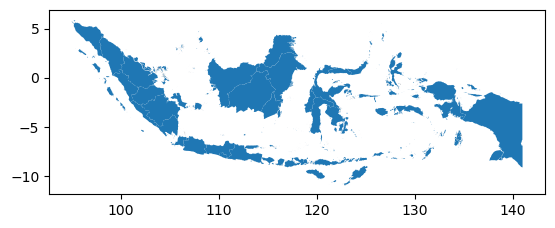

In [3]:
province.plot()

In [18]:
data_covid = pd.read_csv("data/covid_19_indonesia_time_series_all.csv")
data_covid.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,-56,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,-54,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,2,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,0,Province,NaN,Riau,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,-52,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [28]:
df_june_2021 = data_covid.loc[data_covid["Date"] == "1/6/2021"]
df_june_2021

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
10193,1/6/2021,ID-AC,Aceh,29,0,14,15,8805,360,7198,1247,Province,NaN,Aceh,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,5.53,1678.02,0.00,68.61,6.86,4.09%,81.75%,3.63,0.00
10194,1/6/2021,ID-BA,Bali,191,11,170,10,18454,542,16842,1070,Province,NaN,Bali,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,45.30,4376.96,2.61,128.55,12.86,2.94%,91.26%,1.14,11.00
10195,1/6/2021,ID-BT,Banten,189,5,131,53,19334,565,16934,1835,Province,NaN,Banten,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,17.63,1803.15,0.47,52.69,5.27,2.92%,87.59%,1.15,0.63
10196,1/6/2021,ID-BE,Bengkulu,42,2,70,-30,3821,121,3040,660,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,21.00,1910.94,1.00,60.51,6.05,3.17%,79.56%,2.10,NaN
10197,1/6/2021,ID-JK,DKI Jakarta,2402,17,1095,1290,195300,3383,175315,16602,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,221.46,18006.40,1.57,311.91,31.19,1.73%,89.77%,1.32,0.89
10198,1/6/2021,ID-YO,Daerah Istimewa Yogyakarta,272,4,290,-22,13612,297,9196,4119,Province,NaN,Daerah Istimewa Yogyakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,74.91,3748.81,1.10,81.80,8.18,2.18%,67.56%,0.92,1.33
10199,1/6/2021,ID-GO,Gorontalo,0,0,22,-22,3887,104,3459,324,Province,NaN,Gorontalo,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,5,1.0,77,72.0,657.0,11257,1180651,104.88,122.376058,0.687003,0.00,3292.25,0.00,88.09,8.81,2.68%,88.99%,0.00,1.00
10200,1/6/2021,IDN,Indonesia,8854,187,6767,1900,788402,23296,652513,112593,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,33.39,2973.02,0.71,87.85,8.78,2.95%,82.76%,1.19,0.94
10201,1/6/2021,ID-JA,Jambi,41,0,29,12,3397,58,2473,866,Province,NaN,Jambi,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,2.0,141,163.0,1399.0,50058,3493357,69.79,102.723640,-1.697698,11.74,972.42,0.00,16.60,1.66,1.71%,72.80%,2.05,1.00
10202,1/6/2021,ID-JB,Jawa Barat,1255,19,1594,-358,97404,1514,81594,14296,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,27.79,2156.80,0.42,33.52,3.35,1.55%,83.77%,1.04,1.58


In [9]:
df_june_2021['Province'].nunique()

34

In [29]:
df_june_2021 = df_june_2021.drop(df_june_2021[df_june_2021['Location'] == 'Indonesia'].index)
df_june_2021["Province"] = df_june_2021["Province"].str.upper()
df_june_2021

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
10193,1/6/2021,ID-AC,Aceh,29,0,14,15,8805,360,7198,1247,Province,NaN,ACEH,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,5.53,1678.02,0.00,68.61,6.86,4.09%,81.75%,3.63,0.00
10194,1/6/2021,ID-BA,Bali,191,11,170,10,18454,542,16842,1070,Province,NaN,BALI,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,45.30,4376.96,2.61,128.55,12.86,2.94%,91.26%,1.14,11.00
10195,1/6/2021,ID-BT,Banten,189,5,131,53,19334,565,16934,1835,Province,NaN,BANTEN,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,17.63,1803.15,0.47,52.69,5.27,2.92%,87.59%,1.15,0.63
10196,1/6/2021,ID-BE,Bengkulu,42,2,70,-30,3821,121,3040,660,Province,NaN,BENGKULU,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,21.00,1910.94,1.00,60.51,6.05,3.17%,79.56%,2.10,NaN
10197,1/6/2021,ID-JK,DKI Jakarta,2402,17,1095,1290,195300,3383,175315,16602,Province,NaN,DKI JAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,221.46,18006.40,1.57,311.91,31.19,1.73%,89.77%,1.32,0.89
10198,1/6/2021,ID-YO,Daerah Istimewa Yogyakarta,272,4,290,-22,13612,297,9196,4119,Province,NaN,DAERAH ISTIMEWA YOGYAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,74.91,3748.81,1.10,81.80,8.18,2.18%,67.56%,0.92,1.33
10199,1/6/2021,ID-GO,Gorontalo,0,0,22,-22,3887,104,3459,324,Province,NaN,GORONTALO,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,5,1.0,77,72.0,657.0,11257,1180651,104.88,122.376058,0.687003,0.00,3292.25,0.00,88.09,8.81,2.68%,88.99%,0.00,1.00
10201,1/6/2021,ID-JA,Jambi,41,0,29,12,3397,58,2473,866,Province,NaN,JAMBI,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,2.0,141,163.0,1399.0,50058,3493357,69.79,102.723640,-1.697698,11.74,972.42,0.00,16.60,1.66,1.71%,72.80%,2.05,1.00
10202,1/6/2021,ID-JB,Jawa Barat,1255,19,1594,-358,97404,1514,81594,14296,Province,NaN,JAWA BARAT,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,27.79,2156.80,0.42,33.52,3.35,1.55%,83.77%,1.04,1.58
10203,1/6/2021,ID-JT,Jawa Tengah,1023,47,1025,-49,88401,3871,61438,23092,Province,NaN,JAWA TENGAH,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,6.0,576,753.0,7809.0,32801,36364072,1108.64,110.201115,-7.259097,28.13,2431.00,1.29,106.45,10.65,4.38%,69.50%,1.03,2.14


In [89]:
june_2021 = province.merge(df_june_2021, left_on="PROVINSI", right_on="Province")
june_2021 =  june_2021.sort_values(by='New Cases', ascending=False)
june_2021

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
5,6,DKI JAKARTA,3.123689,0.053426,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ...",1/6/2021,ID-JK,DKI Jakarta,2402,17,1095,1290,195300,3383,175315,16602,Province,NaN,DKI JAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,221.46,18006.40,1.57,311.91,31.19,1.73%,89.77%,1.32,0.89
8,9,JAWA BARAT,11.614950,3.032785,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ...",1/6/2021,ID-JB,Jawa Barat,1255,19,1594,-358,97404,1514,81594,14296,Province,NaN,JAWA BARAT,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,27.79,2156.80,0.42,33.52,3.35,1.55%,83.77%,1.04,1.58
9,10,JAWA TENGAH,15.456349,2.819838,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ...",1/6/2021,ID-JT,Jawa Tengah,1023,47,1025,-49,88401,3871,61438,23092,Province,NaN,JAWA TENGAH,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,6.0,576,753.0,7809.0,32801,36364072,1108.64,110.201115,-7.259097,28.13,2431.00,1.29,106.45,10.65,4.38%,69.50%,1.03,2.14
10,11,JAWA TIMUR,33.571284,3.938320,"MULTIPOLYGON Z (((114.20384 -8.65725 0.00003, ...",1/6/2021,ID-JI,Jawa Timur,803,51,905,-153,88754,6743,78934,3077,Province,NaN,JAWA TIMUR,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,19.84,2192.59,1.26,166.58,16.66,7.60%,88.94%,1.19,0.84
27,28,SULAWESI SELATAN,30.284195,3.701920,"MULTIPOLYGON Z (((117.20354 -7.75841 0.00003, ...",1/6/2021,ID-SN,Sulawesi Selatan,463,4,1407,-948,34392,618,28945,4829,Province,NaN,SULAWESI SELATAN,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,21,3.0,311,792.0,2255.0,46717,9426885,201.78,120.162056,-3.731081,49.11,3648.29,0.42,65.56,6.56,1.80%,84.16%,0.72,0.67
14,15,KALIMANTAN TIMUR,58.195153,10.260775,"MULTIPOLYGON Z (((116.46151 -2.19154 0.00003, ...",1/6/2021,ID-KI,Kalimantan Timur,375,5,182,188,28734,782,24115,3837,Province,NaN,KALIMANTAN TIMUR,Indonesia,Asia,Kalimantan,UTC+08:00,NaN,7,3.0,103,197.0,841.0,129067,3552191,27.52,116.468440,0.453858,105.57,8089.09,1.41,220.15,22.01,2.72%,83.92%,1.33,0.63
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",1/6/2021,ID-YO,Daerah Istimewa Yogyakarta,272,4,290,-22,13612,297,9196,4119,Province,NaN,DAERAH ISTIMEWA YOGYAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,74.91,3748.81,1.10,81.80,8.18,2.18%,67.56%,0.92,1.33
15,16,KALIMANTAN UTARA,41.717115,5.692686,"MULTIPOLYGON Z (((117.62917 2.79781 0.00003, 1...",1/6/2021,ID-KU,Kalimantan Utara,205,0,123,82,4453,63,2392,1998,Province,NaN,KALIMANTAN UTARA,Indonesia,Asia,Kalimantan,UTC+08:00,NaN,4,1.0,53,35.0,447.0,75468,648407,8.59,116.218879,2.891013,316.16,6867.60,0.00,97.16,9.72,1.41%,53.72%,2.30,0.00
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",1/6/2021,ID-BA,Bali,191,11,170,10,18454,542,16842,1070,Province,NaN,BALI,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,45.30,4376.96,2.61,128.55,12.86,2.94%,91.26%,1.14,11.00
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",1/6/2021,ID-BT,Banten,189,5,131,53,19334,565,16934,1835,Province,NaN,BANTEN,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,17.63,1803.15,0.4

Text(0.5, 1.0, 'COVID-19 deaths in Indonesia on 1 June 2021')

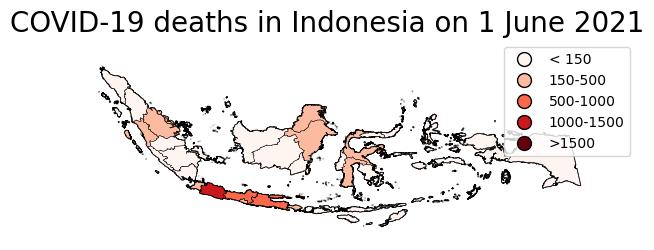

In [91]:
ax = gplt.polyplot(province, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    june_2021,
    hue="New Cases",
    edgecolor="black",
    linewidth=0.3,
    cmap="Reds",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "< 150", "150-500", "500-1000",
        "1000-1500", ">1500"
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

ax.set_title(
    "COVID-19 deaths in Indonesia on 1 June 2021",
    fontsize=20
)

 # No. 2 Jumlah covid dari awal hingga 1 juni 2022

In [71]:
df_june_2022 = data_covid.loc[data_covid["Date"] == "1/6/2022"]
df_june_2022

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
22968,2022-01-06,ID-AC,Aceh,0,0,0,0,38431,2066,36364,1,Province,NaN,Aceh,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,0.00,7324.02,0.00,393.73,39.37,5.38%,94.62%,1.00,1.00
22969,2022-01-06,ID-BA,Bali,4,0,7,-3,114411,4063,110297,51,Province,NaN,Bali,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,0.95,27136.23,0.00,963.67,96.37,3.55%,96.40%,4.00,1.00
22970,2022-01-06,ID-BT,Banten,21,0,1,20,132888,2695,130148,45,Province,NaN,Banten,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,1.96,12393.52,0.00,251.34,25.13,2.03%,97.94%,2.63,1.00
22971,2022-01-06,ID-BE,Bengkulu,0,0,0,0,23105,473,22631,1,Province,NaN,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,0.00,11555.16,0.00,236.55,23.66,2.05%,97.95%,1.00,1.00
22972,2022-01-06,ID-JK,DKI Jakarta,267,0,50,217,866332,13609,851574,1149,Province,NaN,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,24.62,79874.65,0.00,1254.73,125.47,1.57%,98.30%,1.03,1.00
22973,2022-01-06,ID-YO,Daerah Istimewa Yogyakarta,3,1,4,-2,157015,5270,151656,89,Province,NaN,Daerah Istimewa Yogyakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,0.83,43242.73,0.28,1451.38,145.14,3.36%,96.59%,1.50,NaN
22974,2022-01-06,ID-GO,Gorontalo,1,0,0,1,11850,461,11388,1,Province,NaN,Gorontalo,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,5,1.0,77,72.0,657.0,11257,1180651,104.88,122.376058,0.687003,0.85,10036.84,0.00,390.46,39.05,3.89%,96.10%,NaN,1.00
22975,2022-01-06,IDN,Indonesia,533,7,209,317,4264669,144116,4115358,5195,Country,NaN,NaN,Indonesia,Asia,NaN,NaN,NaN,416,98.0,7230,8488.0,74953.0,1916907,265185520,138.34,113.921327,-0.789275,2.01,16081.83,0.03,543.45,54.35,3.38%,96.50%,1.32,1.75
22976,2022-01-06,ID-JA,Jambi,0,1,1,-2,29793,784,29001,8,Province,NaN,Jambi,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,2.0,141,163.0,1399.0,50058,3493357,69.79,102.723640,-1.697698,0.00,8528.47,0.29,224.43,22.44,2.63%,97.34%,0.00,NaN
22977,2022-01-06,ID-JB,Jawa Barat,24,0,27,-3,708970,14756,693768,446,Province,NaN,Jawa Barat,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.53,15698.61,0.00,326.74,32.67,2.08%,97.86%,1.00,1.00


In [72]:
df_june_2022 = df_june_2022.drop(df_june_2022[df_june_2022['Location'] == 'Indonesia'].index)
df_june_2022["Province"] = df_june_2022["Province"].str.upper()
df_june_2022

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
22968,2022-01-06,ID-AC,Aceh,0,0,0,0,38431,2066,36364,1,Province,NaN,ACEH,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,96.910522,4.225615,0.00,7324.02,0.00,393.73,39.37,5.38%,94.62%,1.00,1.0
22969,2022-01-06,ID-BA,Bali,4,0,7,-3,114411,4063,110297,51,Province,NaN,BALI,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,0.95,27136.23,0.00,963.67,96.37,3.55%,96.40%,4.00,1.0
22970,2022-01-06,ID-BT,Banten,21,0,1,20,132888,2695,130148,45,Province,NaN,BANTEN,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,1.96,12393.52,0.00,251.34,25.13,2.03%,97.94%,2.63,1.0
22971,2022-01-06,ID-BE,Bengkulu,0,0,0,0,23105,473,22631,1,Province,NaN,BENGKULU,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,102.338421,-3.533584,0.00,11555.16,0.00,236.55,23.66,2.05%,97.95%,1.00,1.0
22972,2022-01-06,ID-JK,DKI Jakarta,267,0,50,217,866332,13609,851574,1149,Province,NaN,DKI JAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,24.62,79874.65,0.00,1254.73,125.47,1.57%,98.30%,1.03,1.0
22973,2022-01-06,ID-YO,Daerah Istimewa Yogyakarta,3,1,4,-2,157015,5270,151656,89,Province,NaN,DAERAH ISTIMEWA YOGYAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,0.83,43242.73,0.28,1451.38,145.14,3.36%,96.59%,1.50,NaN
22974,2022-01-06,ID-GO,Gorontalo,1,0,0,1,11850,461,11388,1,Province,NaN,GORONTALO,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,5,1.0,77,72.0,657.0,11257,1180651,104.88,122.376058,0.687003,0.85,10036.84,0.00,390.46,39.05,3.89%,96.10%,NaN,1.0
22976,2022-01-06,ID-JA,Jambi,0,1,1,-2,29793,784,29001,8,Province,NaN,JAMBI,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,2.0,141,163.0,1399.0,50058,3493357,69.79,102.723640,-1.697698,0.00,8528.47,0.29,224.43,22.44,2.63%,97.34%,0.00,NaN
22977,2022-01-06,ID-JB,Jawa Barat,24,0,27,-3,708970,14756,693768,446,Province,NaN,JAWA BARAT,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.53,15698.61,0.00,326.74,32.67,2.08%,97.86%,1.00,1.0
22978,2022-01-06,ID-JT,Jawa Tengah,10,2,14,-6,486977,30386,455859,732,Province,NaN,JAWA TENGAH,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,6.0,576,753.0,7809.0,32801,36364072,1108.64,110.201115,-7.259097,0.27,13391.71,0.05,835.60,83.56,6.24%,93.61%,0.42,NaN


In [95]:
june_2022 = province.merge(df_june_2022, left_on="PROVINSI", right_on="Province")
june_2022= june_2022.sort_values(by='Total Cases', ascending=False)
june_2022

,OBJECTID,PROVINSI,Shape_Leng,Shape_Area,geometry,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,City or Regency,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
5,6,DKI JAKARTA,3.123689,0.053426,"MULTIPOLYGON Z (((106.87677 -6.10030 0.00003, ...",2022-01-06,ID-JK,DKI Jakarta,267,0,50,217,866332,13609,851574,1149,Province,NaN,DKI JAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,106.836118,-6.204699,24.62,79874.65,0.00,1254.73,125.47,1.57%,98.30%,1.03,1.0
8,9,JAWA BARAT,11.614950,3.032785,"MULTIPOLYGON Z (((108.68501 -6.76990 0.00003, ...",2022-01-06,ID-JB,Jawa Barat,24,0,27,-3,708970,14756,693768,446,Province,NaN,JAWA BARAT,Indonesia,Asia,Jawa,UTC+07:00,NaN,18,9.0,627,645.0,5312.0,35378,45161325,1276.55,107.603708,-6.920432,0.53,15698.61,0.00,326.74,32.67,2.08%,97.86%,1.00,1.0
9,10,JAWA TENGAH,15.456349,2.819838,"MULTIPOLYGON Z (((108.88353 -7.74846 0.00003, ...",2022-01-06,ID-JT,Jawa Tengah,10,2,14,-6,486977,30386,455859,732,Province,NaN,JAWA TENGAH,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,6.0,576,753.0,7809.0,32801,36364072,1108.64,110.201115,-7.259097,0.27,13391.71,0.05,835.60,83.56,6.24%,93.61%,0.42,NaN
10,11,JAWA TIMUR,33.571284,3.938320,"MULTIPOLYGON Z (((114.20384 -8.65725 0.00003, ...",2022-01-06,ID-JI,Jawa Timur,25,0,20,5,400152,29748,370443,-39,Province,NaN,JAWA TIMUR,Indonesia,Asia,Jawa,UTC+07:00,NaN,29,9.0,666,777.0,7724.0,47803,40479023,846.78,112.732941,-7.723346,0.62,9885.42,0.00,734.90,73.49,7.43%,92.58%,2.08,0.0
14,15,KALIMANTAN TIMUR,58.195153,10.260775,"MULTIPOLYGON Z (((116.46151 -2.19154 0.00003, ...",2022-01-06,ID-KI,Kalimantan Timur,4,0,2,2,158347,5452,152877,18,Province,NaN,KALIMANTAN TIMUR,Indonesia,Asia,Kalimantan,UTC+08:00,NaN,7,3.0,103,197.0,841.0,129067,3552191,27.52,116.468440,0.453858,1.13,44577.28,0.00,1534.83,153.48,3.44%,96.55%,2.00,1.0
4,5,DAERAH ISTIMEWA YOGYAKARTA,3.342892,0.260130,"MULTIPOLYGON Z (((110.81980 -8.20358 0.00003, ...",2022-01-06,ID-YO,Daerah Istimewa Yogyakarta,3,1,4,-2,157015,5270,151656,89,Province,NaN,DAERAH ISTIMEWA YOGYAKARTA,Indonesia,Asia,Jawa,UTC+07:00,Daerah Istimewa,4,1.0,78,46.0,392.0,3133,3631015,1158.90,110.444878,-7.894502,0.83,43242.73,0.28,1451.38,145.14,3.36%,96.59%,1.50,NaN
2,3,BANTEN,9.282228,0.764911,"MULTIPOLYGON Z (((105.54977 -6.99566 0.00003, ...",2022-01-06,ID-BT,Banten,21,0,1,20,132888,2695,130148,45,Province,NaN,BANTEN,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,106.109004,-6.456736,1.96,12393.52,0.00,251.34,25.13,2.03%,97.94%,2.63,1.0
25,26,RIAU,34.130196,7.297050,"MULTIPOLYGON Z (((103.34186 -0.64204 0.00003, ...",2022-01-06,ID-RI,Riau,0,0,5,-5,128938,4117,124488,333,Province,NaN,RIAU,Indonesia,Asia,Sumatera,UTC+07:00,NaN,10,2.0,169,268.0,1591.0,87024,6074100,69.80,101.805109,0.511648,0.00,21227.51,0.00,677.80,67.78,3.19%,96.55%,0.00,1.0
1,2,BALI,6.026646,0.458717,"MULTIPOLYGON Z (((115.12509 -8.84761 0.00003, ...",2022-01-06,ID-BA,Bali,4,0,7,-3,114411,4063,110297,51,Province,NaN,BALI,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,115.131714,-8.369472,0.95,27136.23,0.00,963.67,96.37,3.55%,96.40%,4.00,1.0
27,28,SULAWESI SELATAN,30.284195,3.701920,"MULTIPOLYGON Z (((117.20354 -7.75841 0.00003, ...",2022-01-06,ID-SN,Sulawesi Selatan,3,0,0,3,110021,2241,107744,36,Province,NaN,SULAWESI SELATAN,Indonesia,Asia,Sulawesi,UTC+08:00,NaN,21,3.0,311,792.0,2255.0,46717,9426885,201.78,120.162056,-3.731081,0.32,11670.98,0.00,237.72,23.77,2.04%,97.93%,0.75,1.0


Text(0.5, 1.0, 'Total Cases COVID-19 in Indonesia from start until 1 June 2022')

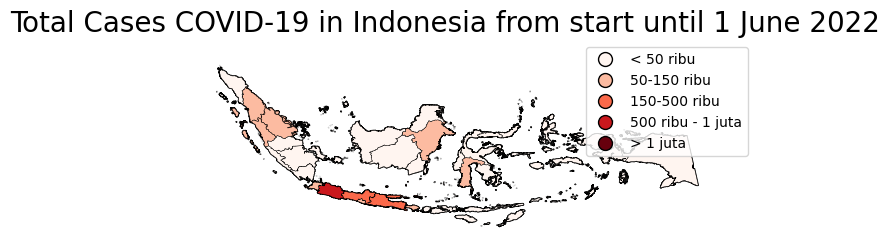

In [98]:
ax = gplt.polyplot(province, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    june_2022,
    hue="Total Cases",
    edgecolor="black",
    linewidth=0.3,
    cmap="Reds",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "< 50 ribu ", "50-150 ribu", "150-500 ribu",
        "500 ribu - 1 juta", "> 1 juta"
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

ax.set_title(
    "Total Cases COVID-19 in Indonesia from start until 1 June 2022",
    fontsize=20
)

# No. 3 Jumlah kasus positif COVID-19 pada 1 Juni 2022

Text(0.5, 1.0, 'COVID-19 deaths in Indonesia on 1 June 2022')

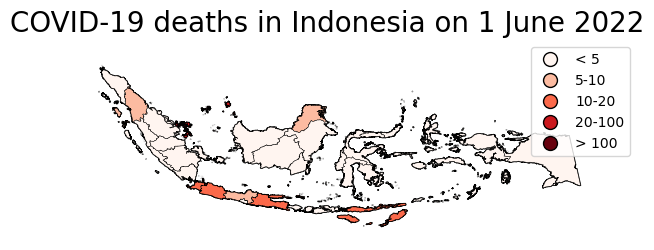

In [88]:
ax = gplt.polyplot(province, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
    june_2022,
    hue="New Cases",
    edgecolor="black",
    linewidth=0.3,
    cmap="Reds",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "< 5 ", "5-10", "10-20",
        "20-100", "> 100"
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

ax.set_title(
    "COVID-19 deaths in Indonesia on 1 June 2022",
    fontsize=20
)